In [1]:
%pylab inline
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


# Generating sample

In [2]:
def gen(sz, k, b):
    x = stats.uniform.rvs(loc=-3, scale=6, size=sz)
    y = k * x + b + stats.norm.rvs(scale=0.2, size=sz)
    return x, y

In [3]:
x, y = gen(500, 0.5, 1)

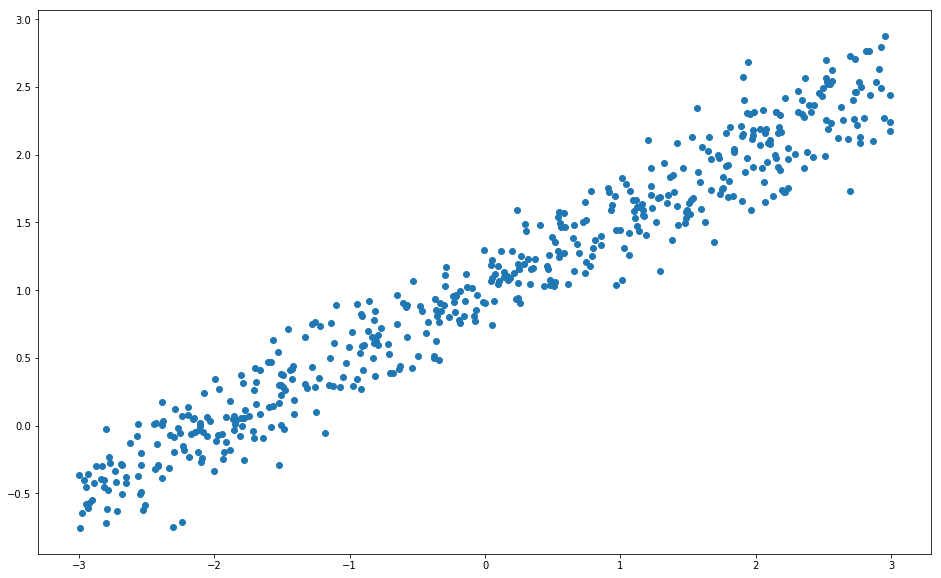

In [4]:
plt.figure(figsize=(16, 10))
plt.scatter(x, y)
plt.show()

# MSE optimization

In [5]:
from scipy import optimize
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
def mse(c, x, y):
    return mean_squared_error(c[0] * x + c[1], y)

In [7]:
k, b = optimize.minimize(mse, [0, 0], args=(x, y)).x
print(k, b)

0.508239860383 1.01649868598


In [8]:
def draw(x, y, k, b):
    plt.figure(figsize=(16, 10))
    plt.scatter(x, y)
    grid = np.linspace(-3, 3, 1000)
    plt.plot(grid, k * grid + b, c="black")
    plt.show()

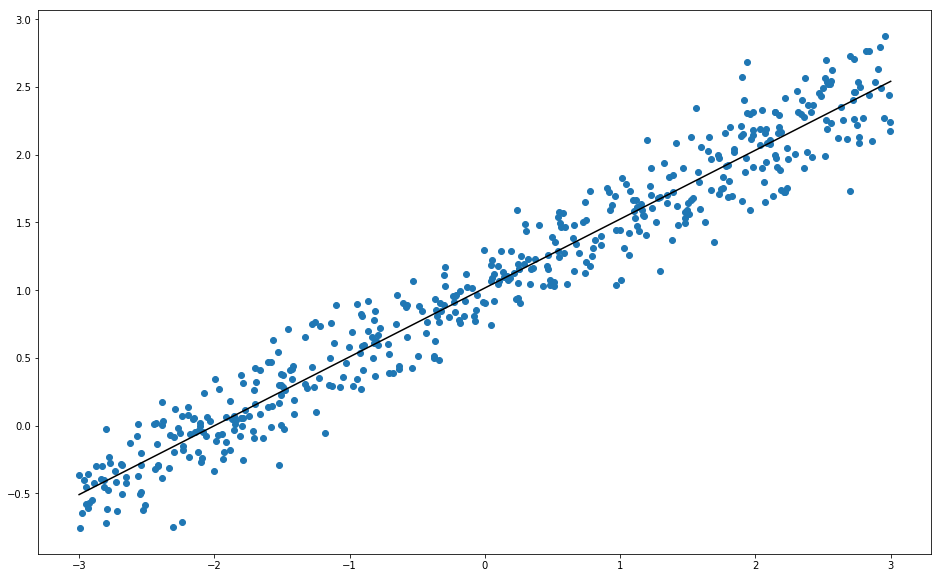

In [9]:
draw(x, y, k, b)

# Modifying sample

In [10]:
x2, y2 = gen(75, 0, -1)
x2 = np.append(x, x2)
y2 = np.append(y, y2)

# MSE optimization on modified sample

In [11]:
k2, b2 = optimize.minimize(mse, [0, 0], args=(x2, y2)).x
print(k2, b2)

0.457969322278 0.764998914513


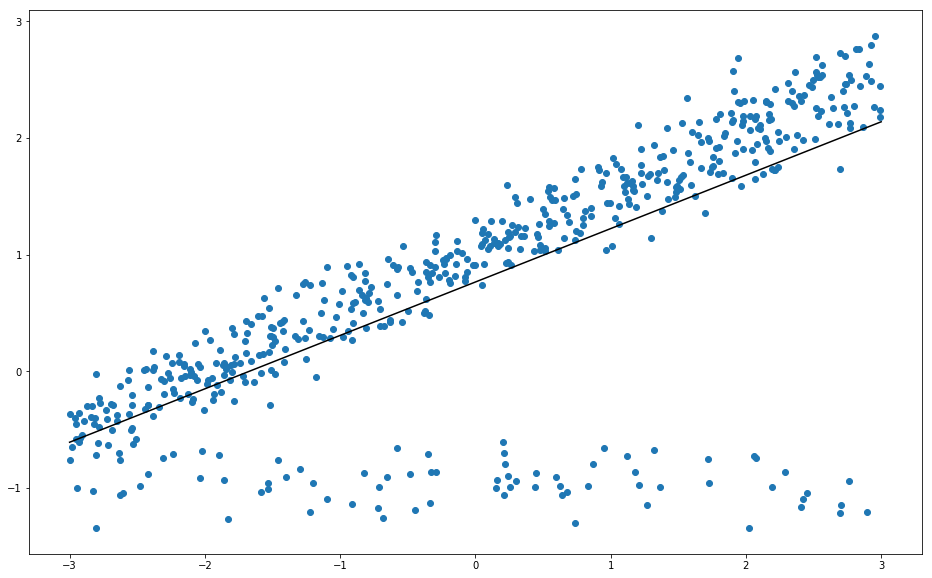

In [12]:
draw(x2, y2, k2, b2)

# MAE optimization on modified sample

In [13]:
def mae(c, x, y):
    return mean_absolute_error(c[0] * x + c[1], y)

In [14]:
k3, b3 = optimize.minimize(mae, [0, 0], args=(x2, y2)).x
print(k3, b3)

0.51309384638 0.985544185779


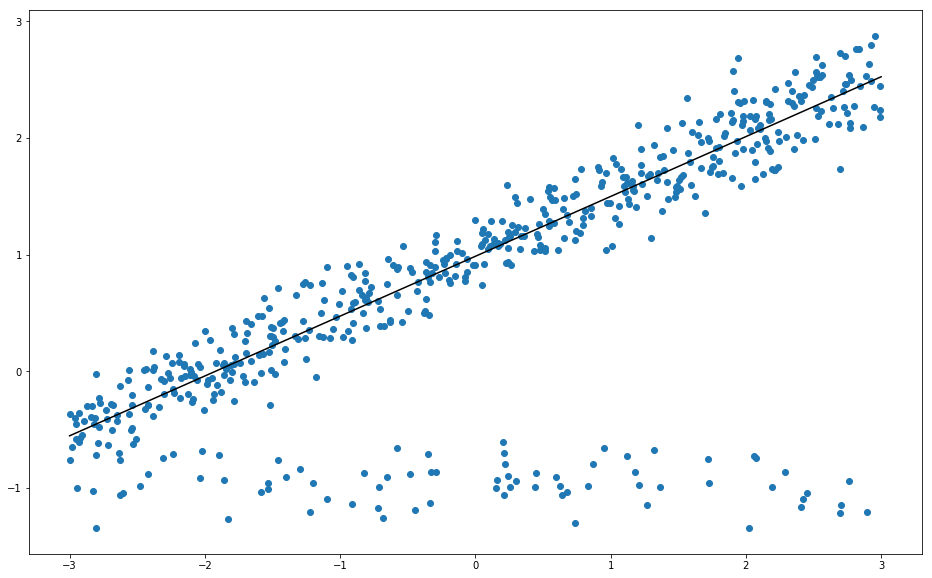

In [16]:
draw(x2, y2, k3, b3)

# Results

MAE metric is more robust for outliers than MSE.